# **Exploratory Data Analysis(EDA)**


# Retail





# Task - 3
# Author: Sandesh Bhat


# **Import Libraries**

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **Import Dataset**

In [3]:
path = '/content/drive/MyDrive/Internship/TSF/Tasks/Task - 3'
dataframe = pd.read_csv(os.path.join(path, 'SampleSuperstore.csv'))
dataframe.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


# **Drop Columns**

In [4]:
dataframe = dataframe.drop(columns = ['Postal Code'])
dataframe

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [5]:
dataframe.tail()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
dataframe.count()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

In [7]:
dataframe.shape

(9994, 12)

# **Check for missing data**

In [8]:
dataframe.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**No missing data**

# **Describe the data**

In [9]:
dataframe.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


**To check the datatypes of the columns**

In [11]:
dataframe.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

# **Outliers**

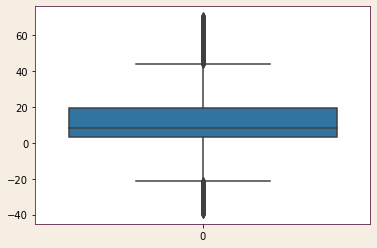

In [37]:
sns.boxplot(data = dataframe['Profit'])
plt.show()

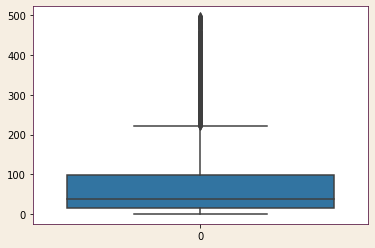

In [38]:
sns.boxplot(data = dataframe['Sales'])
plt.show()

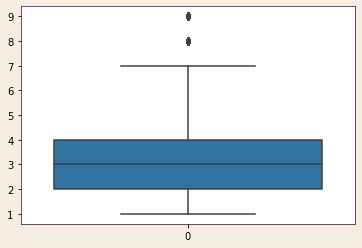

In [39]:
sns.boxplot(data = dataframe['Quantity'])
plt.show()

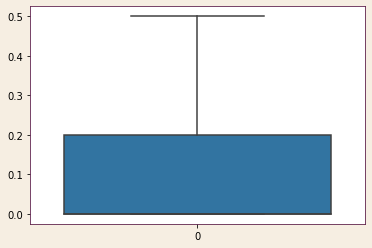

In [40]:
sns.boxplot(data = dataframe['Discount'])
plt.show()

**Handling Outliers**

In [16]:
Q1 = dataframe.quantile(0.25)
Q3 = dataframe.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Sales       192.66000
Quantity      3.00000
Discount      0.20000
Profit       27.63525
dtype: float64


In [17]:
dataframe = dataframe[~((dataframe < (Q1 - 1.5 * IQR)) |(dataframe > (Q3 + 1.5 * IQR))).any(axis=1)]
dataframe.shape

(7143, 12)

# **Correlation**

In [18]:
dataframe.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.127873,0.137533,0.396367
Quantity,0.127873,1.000000,-0.027562,0.229934
Discount,0.137533,-0.027562,1.000000,-0.310667
Profit,0.396367,0.229934,-0.310667,1.000000


**Heatmap**

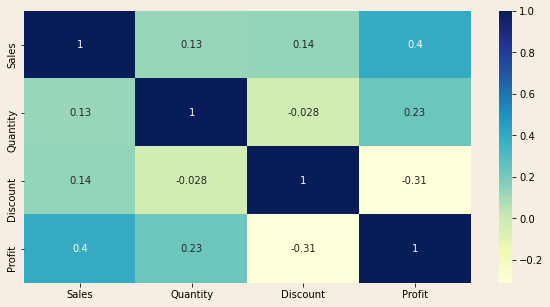

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(dataframe.corr(),cmap="YlGnBu",annot=True)

# **Visualization**

Text(0.5, 0, 'Cities')

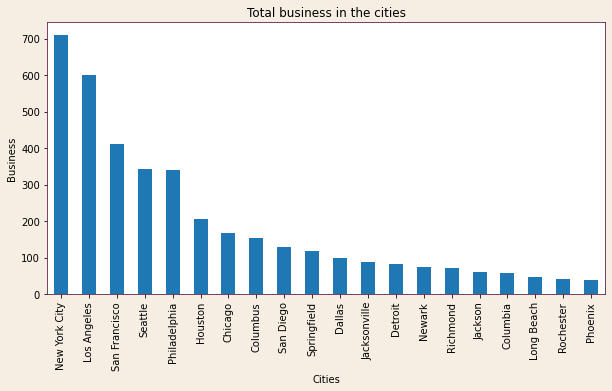

In [36]:
dataframe.City.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.rc_context({'axes.edgecolor':'#581845', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'#f6eee2'})
plt.title("Total business in the cities")
plt.ylabel('Business')
plt.xlabel('Cities')

Text(0.5, 0, 'State')

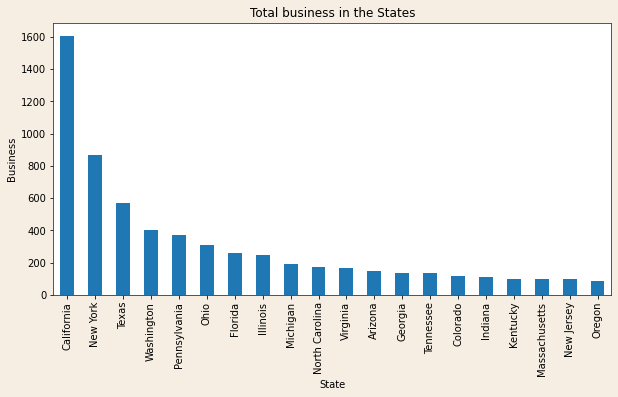

In [21]:
dataframe.State.value_counts().nlargest(20).plot(kind='bar', figsize=(10, 5))
plt.title("Total business in the States")
plt.ylabel('Business')
plt.xlabel('State')

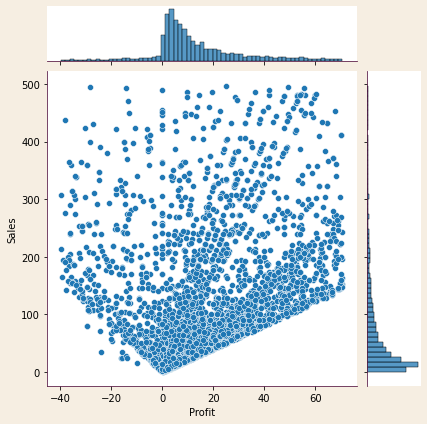

In [23]:
sns.jointplot(x="Profit", y="Sales", data = dataframe)
plt.show()

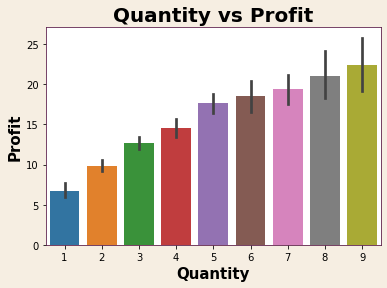

In [24]:
# to modify the length and width of the graph
plt.title("Quantity vs Profit", fontweight = 'bold', fontsize = 20)
plt.xlabel("", fontsize = 15, fontweight = 'bold')
plt.ylabel("", fontsize = 15, fontweight = 'bold')

sns.barplot(x = 'Quantity',y = 'Profit',data = dataframe)
plt.show()

If large amount of product is sold then the profit increases considerably

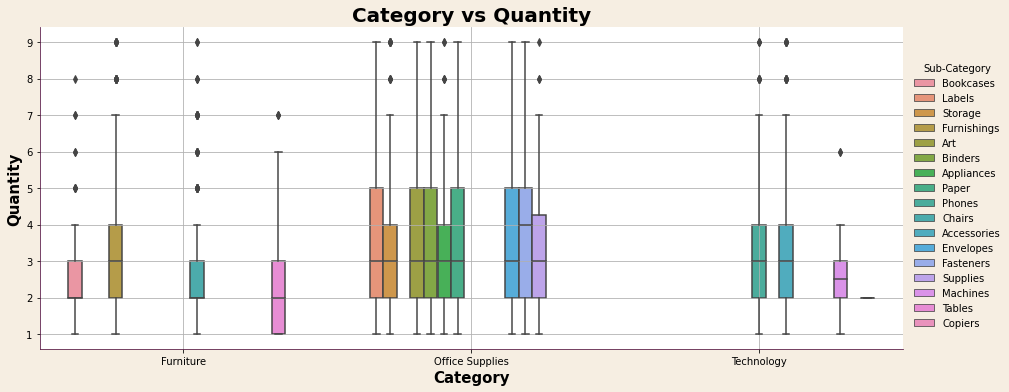

In [25]:
sns.catplot(x="Category", y="Quantity", hue = "Sub-Category", kind="box",height = 5,aspect = 2.5, data=dataframe)
plt.title("Category vs Quantity", fontweight = 'bold', fontsize = 20)
plt.xlabel("Category", fontsize = 15, fontweight = 'bold')
plt.ylabel("Quantity", fontsize = 15, fontweight = 'bold')
plt.grid()
plt.show()

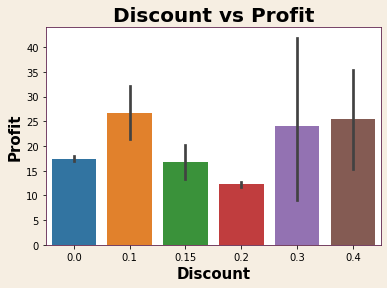

In [26]:
# to modify the length and width of the graph
plt.title("Discount vs Profit", fontweight = 'bold', fontsize = 20)
plt.xlabel("", fontsize = 15, fontweight = 'bold')
plt.ylabel("", fontsize = 15, fontweight = 'bold')

# sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x = 'Discount',y = 'Profit',data = dataframe[dataframe.Profit > 0])

plt.show()

A discount of 0.1 to 0.4 units is ideal to gain a profit 

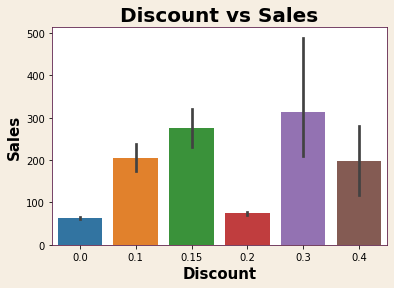

In [27]:
# to modify the length and width of the graph
plt.title("Discount vs Sales", fontweight = 'bold', fontsize = 20)
plt.xlabel("", fontsize = 15, fontweight = 'bold')
plt.ylabel("", fontsize = 15, fontweight = 'bold')

# sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x = 'Discount',y = 'Sales',data = dataframe[dataframe.Profit > 0])

plt.show()

A discount of 0.3 units results in a highest amount of sale

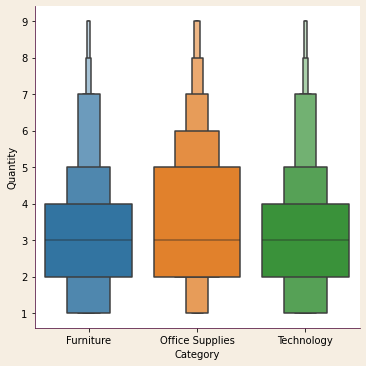

In [28]:
sns.catplot(x="Category", y="Quantity", kind="boxen", data=dataframe)

Office Supplies gets the highest quantity of Products

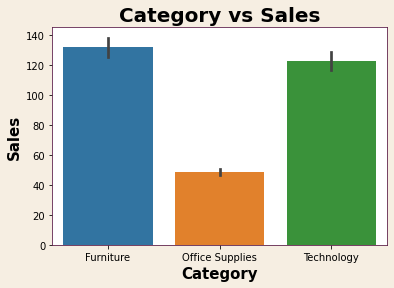

In [30]:
plt.title("Category vs Sales", fontweight = 'bold', fontsize = 20)
plt.xlabel("", fontsize = 15, fontweight = 'bold')
plt.ylabel("", fontsize = 15, fontweight = 'bold')

sns.barplot(x = 'Category',y = 'Sales',data = dataframe)

plt.show()

Furniture products have the maximum amount of sale whereas Office Suppliers have the least 

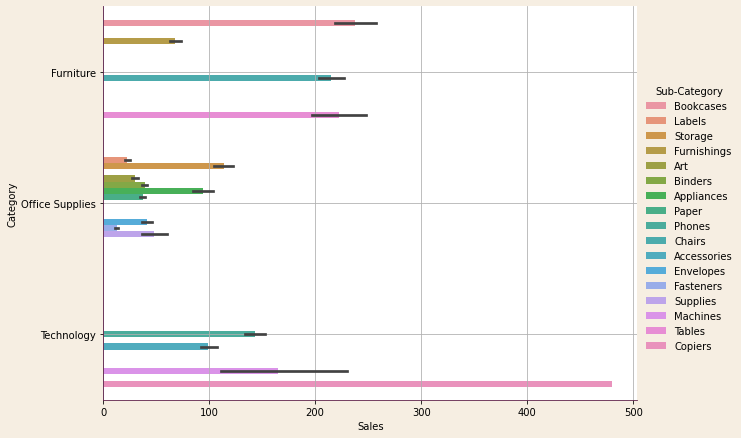

In [31]:
sns.catplot(x="Sales", y="Category", hue = "Sub-Category", kind="bar",height = 6,aspect = 1.5, data=dataframe)
plt.grid()
plt.show()

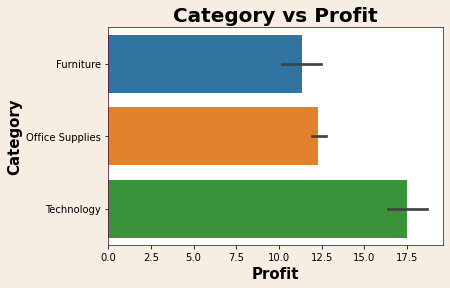

In [32]:
# to modify the length and width of the graph
plt.title("Category vs Profit", fontweight = 'bold', fontsize = 20)
plt.xlabel("", fontsize = 15, fontweight = 'bold')
plt.ylabel("", fontsize = 15, fontweight = 'bold')

sns.barplot(x = 'Profit',y = 'Category',data = dataframe)

plt.show()

Technological products gain the highest profit among all

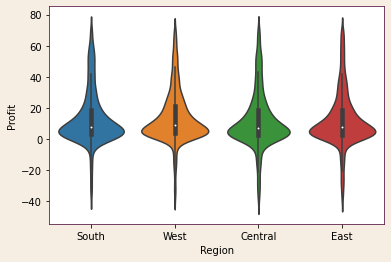

In [33]:
sns.violinplot(x="Region", y="Profit", data=dataframe)

All the regions gain almost equal profits.

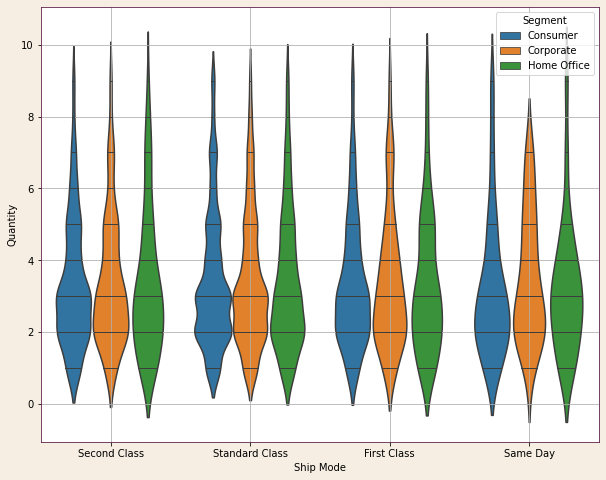

In [34]:
plt.figure(figsize = (10,8))
sns.violinplot(x="Ship Mode", y="Quantity", hue="Segment",inner="stick",scale_hue=False, data=dataframe)
plt.grid()
plt.show()